# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:
sensor.isnull().sum()

# There isn't any missing data

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [5]:
# Your code here:
sensor.shape


(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

Assign the time series index to the dataframe's index.

In [6]:
# Your code here:
sensor.index = pd.date_range(start = '2018-01-01', end = '2018-01-01 00:29:10', periods = sensor.shape[0])


In [7]:
# Your code here:
sensor.tail()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:29:06,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
2018-01-01 00:29:07,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
2018-01-01 00:29:08,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
2018-01-01 00:29:09,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441
2018-01-01 00:29:10,1.869375,-0.596783,2.433775,0.790551,0.561984,0.243315,0.291873,1.102207,-0.436925,-0.065011,-0.042575,0.046052


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

<ipython-input-8-7ed822145730>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq = 60)


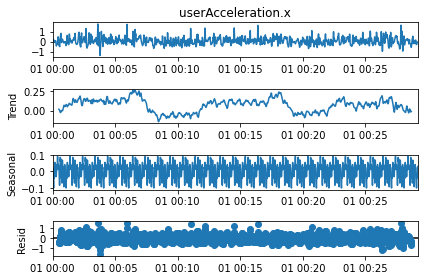

In [8]:
# Your code here:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq = 60)
resplot = res.plot()



Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

<ipython-input-9-5c79a43bbb5a>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq = 60)


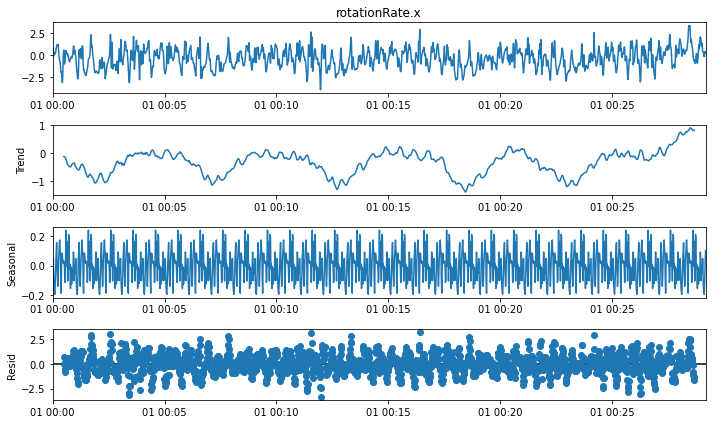

In [9]:
plt.rc("figure", figsize=(10,6))
res = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq = 60)
resplot = res.plot()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

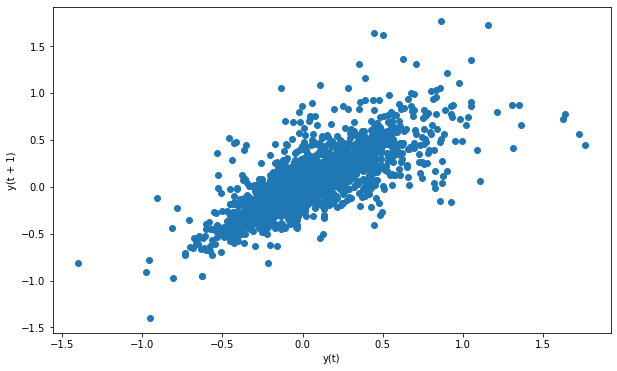

In [10]:
# Your code here:
from pandas.plotting import lag_plot
 
lag_plot(sensor['userAcceleration.x']);

Create a lag plot for `rotationRate.x`

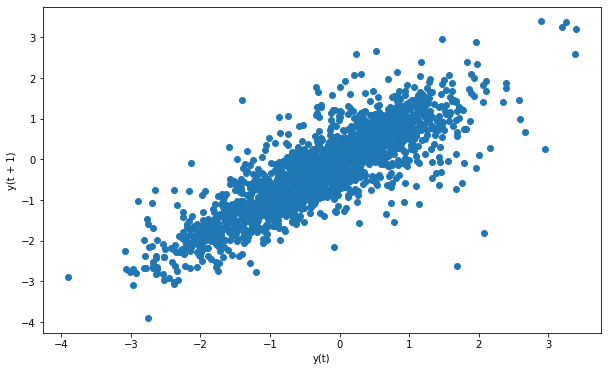

In [11]:
# Your code here:

lag_plot(sensor['rotationRate.x']);

What are your conclusions from both visualizations?

In [12]:
# Your conclusions here:
"""
The data seems to fit generally along the diagonal which indicates that there is an autoregressive relationship (correlation).
"""


'\nThe data seems to fit generally along the diagonal which indicates that there is an autoregressive relationship.\n'

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [18]:
# Your code here:
from statsmodels.tsa.stattools import adfuller

variables = ['userAcceleration.x', 'rotationRate.x']
for var in variables:
    print (var)
    result = adfuller(sensor[var])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('\n')

userAcceleration.x
ADF Statistic: -17.957994
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


rotationRate.x
ADF Statistic: -5.269861
p-value: 0.000006
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568




What are your conclusions from this test?

In [14]:
# Your conclusions here:
"""
The negative ADF statistic and small p-value allow us to reject the null-hypothesis 
and indicates that both variables are stationary.
"""


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [26]:
# Your code here:
from statsmodels.tsa.arima_model import ARMA
train = sensor.iloc[0:-10, :]
test = sensor.iloc[-10:, :]

model = ARMA(train['userAcceleration.x'], order=(2, 1))
model_fit = model.fit(disp=False)
# get predeictions for the last 10 lines of sensor (excluded from train set)
predictions = model_fit.predict(len(sensor['userAcceleration.x'])-10, len(sensor['userAcceleration.x'])-1)
predictions


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


2018-01-01 00:29:01    0.173149
2018-01-01 00:29:02    0.142896
2018-01-01 00:29:03    0.100522
2018-01-01 00:29:04    0.070106
2018-01-01 00:29:05    0.056099
2018-01-01 00:29:06    0.053778
2018-01-01 00:29:07    0.056790
2018-01-01 00:29:08    0.060646
2018-01-01 00:29:09    0.063316
2018-01-01 00:29:10    0.064493
Freq: S, dtype: float64

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [27]:
# Your code here:
from statsmodels.tools.eval_measures import rmse

rmse(predictions, test['userAcceleration.x'])
# The RMSE indicates that the fit might not be great.

0.22529863761263894

In [33]:
pd.DataFrame({'predictions': predictions,'actual':  test['userAcceleration.x']})

,predictions,actual
2018-01-01 00:29:01,0.173149,0.149749
2018-01-01 00:29:02,0.142896,0.038461
2018-01-01 00:29:03,0.100522,-0.169175
2018-01-01 00:29:04,0.070106,-0.300361
2018-01-01 00:29:05,0.056099,-0.270174
2018-01-01 00:29:06,0.053778,-0.268367
2018-01-01 00:29:07,0.056790,-0.102444
2018-01-01 00:29:08,0.060646,-0.085590
2018-01-01 00:29:09,0.063316,-0.048105
2018-01-01 00:29:10,0.064493,-0.065011
